In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import cmath

In [0]:
def read_signal(E, A_pol): #pol cam에서 읽는 신호(intensity)
    if A_pol == 0:
        JM = np.array([[1,0],[0,0]])

    elif A_pol == 45:
        JM = np.array([[0.5,0.5],[0.5,0.5]])

    elif A_pol == 90:
        JM = np.array([[0,0],[0,1]])

    elif A_pol == 135:
        JM = np.array([[0.5,-0.5],[-0.5,0.5]])

    result = np.dot(JM,E)
    Ex = abs(result[[0],[0]])
    Ey = abs(result[[1],[0]])
    return sqrt(Ex**2 + Ey**2)

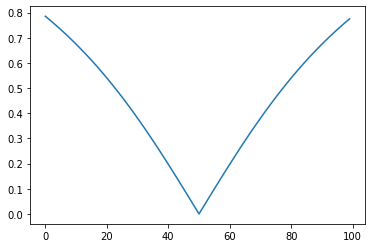

In [0]:
#투입각 구하는 부분.
x = np.arange(100)
z = 50
theta = np.arctan2(abs(x-50),z)

plt.plot(theta)

In [0]:
size = 100
def theta(x,height): #y도 사용 가능
    return atan2(abs(x-size/2),height)

def vector_K (x, y, height):
    k = np.array([[cos(x),sin(y),height]])

theta(50,50)

0.0

In [0]:
kn = acos(1/sqrt(3)) #normal 하게 들어온 경우 각도

def PS_s(ang):
    '''
    phase shift for P pol
    '''

    #A = radians(ang)
    y = sqrt((n*sin(ang))**2 -1)
    x = n*cos(ang)
    delta = atan2(y,x)
    return 2*delta

def PS_p(ang):
    '''
    phase shift for s pol
    '''
    #A = radians(ang)
    y = n*sqrt((n*sin(ang))**2 -1)
    x = cos(ang)
    delta = atan2(y,x)
    return 2*delta

m1 = np.exp(1j*PS_s(kn))
m2 = np.exp(1j*PS_p(kn))
MP = np.array([[m1,0],[0,m2]])
# 이것까지는 뭐 딱히 문제 없는듯

testm = cmath.polar(m1)

print(testm)

(1.0, 1.3121180860375543)


In [0]:
#Path
ACB = [150, -60, 60, -90]
ABC = [150, 60, -60, 30]
BAC = [-90, -60, 60, 30]
BCA = [-90, 60, -60, 150]
CBA = [30, -60, 60, 150]
CAB = [30, 60, -60, -90]

F = np.array([[-1,0],[0,1]])

def rotate(ang):
    return np.array([[cos(ang),sin(ang)],[-sin(ang),cos(ang)]])

def Mat_TR(Path):
    r0 = np.dot(MP,rotate(Path[0]))
    r1 = np.dot(MP,rotate(Path[1]))
    r2 = np.dot(MP,rotate(Path[2]))
    r3 = np.dot(F,rotate(Path[3]))
    return np.dot(np.dot(r3,r2),np.dot(r1,r0))

M = Mat_TR(ACB)
print(Mat_TR(ACB))

[[ 0.59833842-0.29658514j  0.73883732+0.09026518j]
 [-0.64186892-0.37687223j  0.29535041+0.59894887j]]


In [0]:
mat11 = M[[0],[0]]
print(mat11)

[0.59833842-0.29658514j]


In [0]:
#MP를 계속해서 계산해주어야 한다.
# normal vector
n1 = (1/sqrt(6))*np.array([[-1],[-sqrt(3)],[sqrt(2)]])
n2 = (1/sqrt(6))*np.array([[2],[0],[sqrt(2)]])
n3 = (1/sqrt(6))*np.array([[-1],[sqrt(3)],[sqrt(2)]])

def norm(k):
    result = 0
    for i in enumerate(k):
        result = result + abs(k[[i]]) **2
    return (1/sqrt(result)) * k

# 새로이 알파까지 정해줘야 한다.

In [85]:
size = 100
def input_k(x, y, height):
    """
    find input theta and define K vector
    :return: vector K
    """
    vec = np.array([x - size/2, y - size/2, -height])
    mag = np.sqrt(vec[0]**2 + vec[1]**2 + vec[2]**2)
    return (1/mag) * vec

print(input_k(25,25, 50))

[-0.40824829 -0.40824829 -0.81649658]


In [86]:
nA = (1 / sqrt(6)) * np.array([[-1], [-sqrt(3)], [sqrt(2)]])
vc = np.array([1,2,3])
print(np.dot(vc,nA))

[-0.09041105]
